In [ ]:
#Parameter generation
import random
import numpy 
primes=[]
def getprimes(n):
    for num in range(2,n+1):
        i = 2
        for i in range(2, num):
            if(num % i == 0):
                i = num
                break;
    # If the number is prime then print it.
        if(i != num):
            primes.append(num)
getprimes(100)
#Choosing a random prime numbers from 0 to 100
m1 = primes[random.randrange(1,24)]
m2 = primes[random.randrange(1,24)]
 
print("choosen prime numbers are:")
print (" m1 =",m1," m2 =", m2)
# to find M
M = m1*m2
print(M)

choosen prime numbers are:
 m1 = 73  m2 = 79
5767


In [ ]:
# finding the M1 and M2 
M1 = int(M/m1)
M2 = int(M/m2)

print(M1)
print(M2)

79
73


In [ ]:
# here z1 is inverse of M1
z1 = 0
x = M1
while((z1 * x) % m1 != 1):
  z1 = z1 + 1
Z1 = z1
print(Z1)

# z2 is inverse of M2
z2 = 0
x = M2
while((z2 * x) % m2 != 1):
  z2 = z2 + 1
Z2 = z2
print(Z2)
# SIS key are M1,M2 and Z1,Z2

61
13


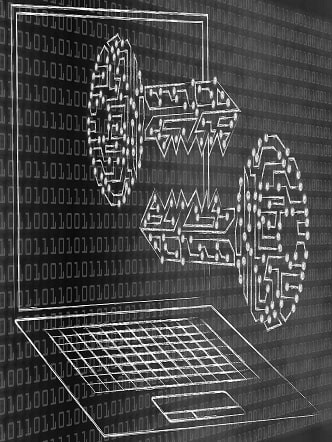

8 (332, 442) JPEG


In [ ]:
from PIL import Image
jpgfile = Image.open("/content/drive/MyDrive/CoverImage.jpg")
jpgfile.show()
print (jpgfile.bits, jpgfile.size, jpgfile.format)
row,col = jpgfile.size
pixels = jpgfile.load()

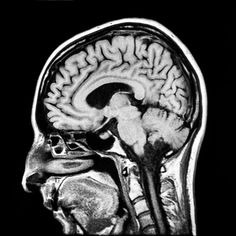

8 (332, 442) JPEG


In [ ]:
from PIL import Image
jpgfile1 = Image.open("/content/drive/MyDrive/Brain-Tumor-Classification-DataSet/Training/no_tumor/image(154).jpg")
jpgfile1.show()
print (jpgfile.bits, jpgfile.size, jpgfile.format)
row1,col1 = jpgfile1.size
pixels1 = jpgfile1.load()

In [ ]:
# CHINESE REMAINDER THEOREM
def crt(pt,Z,M):
    return (pt*Z*M)

(51, 51, 51)


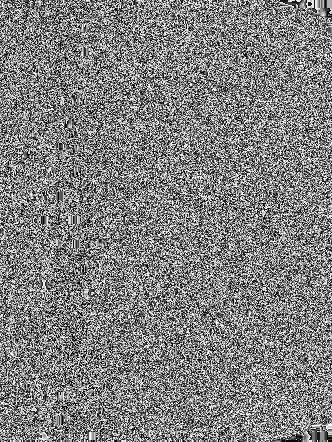

In [ ]:
# Seprate the images into pixels and apply CRT for image 1
enc = [[0 for x in range(row)] for y in range(col)]
for i in range(col):
    for j in range(row):
        r,g,b = pixels[j,i]
        r1 = crt(r,Z1,M1)
        g1 = crt(g,Z1,M1)
        b1 = crt(b,Z1,M1)
        enc[i][j] = [r1,g1,b1]
print (pixels[row-1,col-1])
img = numpy.array(enc,dtype = numpy.uint8)
img3 = Image.fromarray(img,"RGB")
img3.save("/content/Encrypted_image_Cover.jpg")

#Encrypted image which would be hidden in transmission
img3

(0, 0, 0)


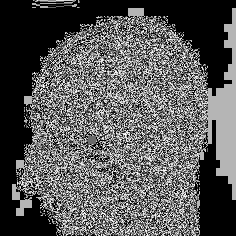

In [ ]:
# Seprate the images into pixels and apply CRT for image 2
enc1 = [[0 for x in range(row1)] for y in range(col1)]
for i in range(col1):
    for j in range(row1):
        r,g,b = pixels1[j,i]
        r1 = crt(r,Z2,M2)
        g1 = crt(g,Z2,M2)
        b1 = crt(b,Z2,M2)
        enc1[i][j] = [r1,g1,b1]
print (pixels1[row1-1,col1-1])
img1 = numpy.array(enc1,dtype = numpy.uint8)
img13 = Image.fromarray(img1,"RGB")
img13.save("/content/Encrypted_image_Brain.jpg")

#Encrypted image which would be hidden in transmission
img13

In [ ]:
# Combine the both the encrypted image
from PIL import Image

def __int_to_bin(rgb):
    r, g, b = rgb
    return ('{0:08b}'.format(r),'{0:08b}'.format(g),'{0:08b}'.format(b))

def __bin_to_int(rgb):
    r, g, b = rgb
    return (int(r, 2),int(g, 2),int(b, 2))

def __merge_rgb(rgb1, rgb2):
    r1, g1, b1 = rgb1
    r2, g2, b2 = rgb2
    rgb = (r1[:4] + r2[:4],g1[:4] + g2[:4],b1[:4] + b2[:4])
    return rgb

# Homomorphic Addition - merging of images    
def merge(img1, img2):
    # Check the images dimensions
    if img2.size[0] > img1.size[0] or img2.size[1] > img1.size[1]:
        raise ValueError('Image 2 should not be larger than Image 1!')
     # Get the pixel map of the two images
    pixel_map1 = img1.load()
    pixel_map2 = img2.load()

    # Create a new image that will be outputted
    new_image = Image.new(img1.mode, img1.size)
    pixels_new = new_image.load()

    for i in range(img1.size[0]):
        for j in range(img1.size[1]):
            rgb1 = __int_to_bin(pixel_map1[i, j])
            #Use a black pixel as default
            rgb2 = __int_to_bin((0, 0, 0))
            #Check if the pixel map position is valid for the second image
            if i < img2.size[0] and j < img2.size[1]:
                rgb2 = __int_to_bin(pixel_map2[i, j])
            #Merge the two pixels and convert it to a integer tuple
            rgb = __merge_rgb(rgb1, rgb2)
            pixels_new[i, j] = __bin_to_int(rgb)
    return new_image

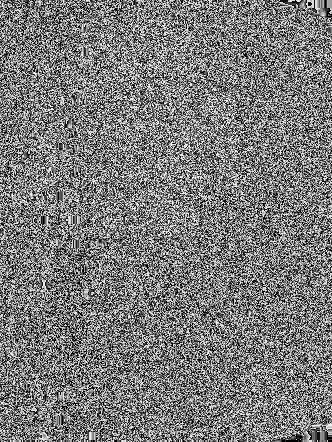

In [ ]:
# Image is transmitted - secrret sharing
img1=Image.open("/content/Encrypted_image_Brain.jpg")
img2=Image.open("/content/Encrypted_image_Cover.jpg")
transmit_img=merge(img2,img1)
transmit_img.save("/content/transmitted.jpg")
transmit_img

In [ ]:
from PIL import Image
import numpy as np
from scipy.interpolate import lagrange as lag


n = 10
r = 8
path = "/content/transmitted.jpg"

In [ ]:
def read_image(path):
    img = Image.open(path).convert('L') 
    img_array = np.asarray(img)
    return img_array.flatten(), img_array.shape

In [ ]:
def polynomial(img, n, r):
    num_pixels = img.shape[0]
    coef = np.random.randint(low = 0, high = 251, size = (num_pixels, r - 1))
    # print(coef.shape)
    gen_imgs = []
    for i in range(1, n + 1):
        base = np.array([i ** j for j in range(1, r)])
        base = np.matmul(coef, base)
        img_ = img + base
        img_ = img_ % 251
        gen_imgs.append(img_)

    return np.array(gen_imgs)

In [ ]:
def lagrange(x, y, num_points, x_test):
    l = np.zeros(shape=(num_points, ))
    for k in range(num_points):
        l[k] = 1
        for k_ in range(num_points):
            if k != k_:
                l[k] = l[k]*(x_test-x[k_])/(x[k]-x[k_])
            else:
                pass        
    L = 0
    for i in range(num_points):
        L += y[i]*l[i]
    return L

In [ ]:
def decode(imgs, index, r, n):
    assert imgs.shape[0] >= r
    x = np.array(index)
    dim = imgs.shape[1]
    img = []
    for i in range(dim):
        y = imgs[:, i]
        poly = lag(x, y)
        pixel = poly(0) % 251
        img.append(pixel)
    return np.array(img)

In [ ]:
    
if __name__ == "__main__":
    img_flattened, shape = read_image(path)
    gen_imgs = polynomial(img_flattened, n = n, r = r)
    to_save = gen_imgs.reshape(n, *shape)
    for i, img in enumerate(to_save):
        Image.fromarray(img.astype(np.uint8)).save("share{}.jpg".format(i + 1))


In [ ]:
origin_img = decode(gen_imgs[0:r, :], list(range(1, r + 1)), r = r, n = n)
origin_img = origin_img.reshape(*shape)
Image.fromarray(origin_img.astype(np.uint8)).save("ShareCombined.jpg")

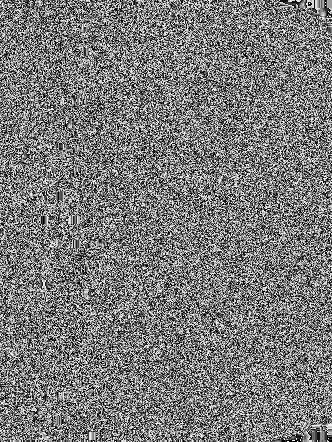

In [ ]:
ShareCombined=Image.open("/content/ShareCombined.jpg")
ShareCombined

In [ ]:
# Image is received and want to unmerge
def unmerge(img):
        """Unmerge an image.
        :param img: The input image.
        :return: The unmerged/extracted image.
        """

        # Load the pixel map
        pixel_map = img.load()

        # Create the new image and load the pixel map
        new_image = Image.new(img.mode, img.size)
        pixels_new = new_image.load()

        # Tuple used to store the image original size
        original_size = img.size

        for i in range(img.size[0]):
            for j in range(img.size[1]):
                # Get the RGB (as a string tuple) from the current pixel
                r, g, b = __int_to_bin(pixel_map[i, j])

                # Extract the last 4 bits (corresponding to the hidden image)
                # Concatenate 4 zero bits because we are working with 8 bit
                rgb = (r[4:] + '0000',
                       g[4:] + '0000',
                       b[4:] + '0000')

                # Convert it to an integer tuple
                pixels_new[i, j] = __bin_to_int(rgb)

                # If this is a 'valid' position, store it
                # as the last valid position
                if pixels_new[i, j] != (0, 0, 0):
                    original_size = (i + 1, j + 1)

        # Crop the image based on the 'valid' pixels
        new_image = new_image.crop((0, 0, original_size[0], original_size[1]))

        return new_image

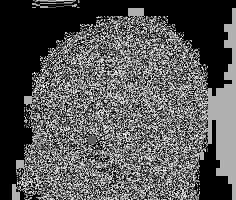

In [ ]:
# Unmerged image
transmit=Image.open("/content/ShareCombined.jpg")
unmerge(transmit_img)

In [ ]:
# CHINESE REMAINDER THEOREM for decrypt
def de_crt(pt,Z,M):
    return (pt/Z/M)

(51, 51, 51)


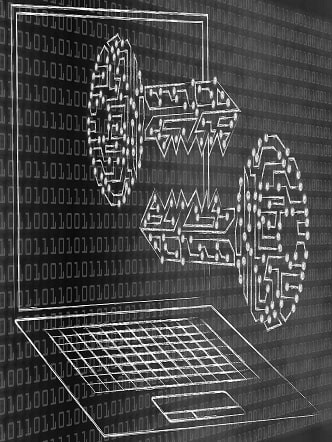

In [ ]:
# Seprate the images into pixels and apply DE_CRT for image 1
dec = [[0 for x in range(row)] for y in range(col)]
for i in range(col):
    for j in range(row):
        r,g,b = enc[i][j]
        r1 = de_crt(r,Z1,M1)
        g1 = de_crt(g,Z1,M1)
        b1 = de_crt(b,Z1,M1)
        dec[i][j] = [r1,g1,b1]
print (pixels[row-1,col-1])
dec = numpy.array(dec,dtype = numpy.uint8)
dec3 = Image.fromarray(dec,"RGB")
dec3

(0, 0, 0)


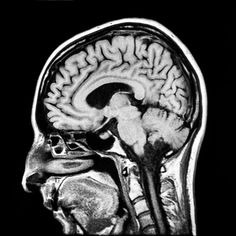

In [ ]:
# Shared image recovery
# Seprate the images into pixels and apply DE_CRT for image 2
dec1 = [[0 for x in range(row1)] for y in range(col1)]
for i in range(col1):
    for j in range(row1):
        r,g,b = enc1[i][j]
        r1 = de_crt(r,Z2,M2)
        g1 = de_crt(g,Z2,M2)
        b1 = de_crt(b,Z2,M2)
        dec1[i][j] = [r1,g1,b1]
print (pixels1[row1-1,col1-1])
dec1 = numpy.array(dec1,dtype = numpy.uint8)
dec13 = Image.fromarray(dec1,"RGB")
dec13